In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Question 1:

In the cannonball example from lecture, we predicted the trajectory of the cannonball including wind along the direction of the launch. Now I want you to consider the case where a wind is blowing at an angle with respect to the launch direction, blowing the cannonball off path. You will also use a different function than what we used in class to model the air density as a function of height.

Use Euler's method to predict the trajectory of a cannonball launched at an angle of $37\degree$ with an initial speed of 550 m/s. Assume the projectile is launched from the sea level ($y=0$) towards the east. Assume a horizontal wind is blowing with a speed of 11 m/s (around 25mph), oreinted at an angle of $22\degree$ north of east. Incorporate the effects of the air resistance, assuming the air density varies as a function of height as $\rho =  \rho_0(1-\frac{ay}{T_0})^b$, where $a=6.5\times 10^{-3}$ K/m, $b=2.5$, and $T_0=300$ K. You may assume that the ratio of the drag factor ($D$ in $F_{\text{air}} = Dv^2)$ to the mass has a value $D/m=3.2\times 10^{-5}$ at sea level ($y=0$). Plot the three dimensional trjectory of the cannonball ($y$ vs $x,z$). What is the range of the cannonball? At the position it lands how far displaced is it from due east?

Notes: Let $y$ be the vertical direction as we have in the previous examples. Let the $z$ axis point towards the east (the direction of launch), and let the $x$ axis point towards the north. In other words, the $xz$ plane is, locally speaking, the surface of the Earth, and the $y$ axis represents height above the Earth. Note that the wind has both $x$ and $z$ components. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


range with vwind =  11.0 : 21419


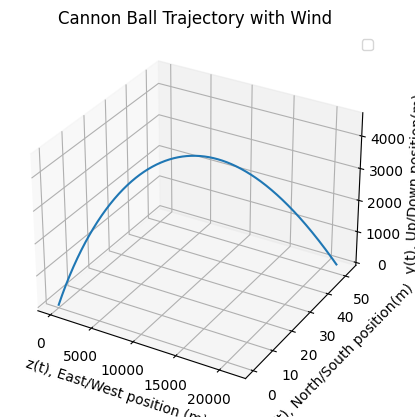


The range of the cannonball is 21391.095441148114 meters
The cannonball lands at a position that is 52.3149980605988 meters normal to the Eastward direction (positive z-axis)


In [13]:
# define initial conditions and constants
x0, y0, z0 = 0, 0, 0
v0_x, v0_y, v0_z = 0, 550*math.sin(np.radians(37.)), 550*math.cos(np.radians(37.))
t0     = 0
g      = 9.81
DoverM = 2.3e-5

# choose step size
h=0.1

thetadeg=35.
theta=np.radians(thetadeg)

# function for variable air density
def fD(y):
    a = 6.5e-3
    b = 2.5
    T0 = 300
    return DoverM * (1 - a*y/T0)**b

# wind speed
vwind = 11.
vwind_x, vwind_y, vwind_z = vwind*math.sin(np.radians(22)), 0, vwind*math.cos(np.radians(22))
windlabel=r'11 m/s wind $22^\degree$ North of East'

xold = x0
yold = y0
zold = z0

vxold = v0_x
vyold = v0_y
vzold = v0_z

vproj_air_x = vxold - vwind_x
vproj_air_y = vyold - vwind_y
vproj_air_z = vzold - vwind_z
vproj_air = math.sqrt((vproj_air_x)**2 + (vproj_air_y)**2 + (vproj_air_z)**2)


xpoints = []
ypoints = []
zpoints = []
while yold>-0.1:
    xpoints.append(xold)
    ypoints.append(yold)
    zpoints.append(zold)

    xnew = xold + h*vxold
    ynew = yold + h*vyold
    znew = zold + h*vzold

    vxnew = vxold -h*fD(yold)*vproj_air*vproj_air_x
    vynew = vyold -h*g - h*fD(yold)*vproj_air*vproj_air_y
    vznew = vzold -h*fD(yold)*vproj_air*vproj_air_z

    xold = xnew
    yold = ynew
    zold = znew

    vxold = vxnew
    vyold = vynew
    vzold = vznew

    vproj_air_x = vxold - vwind_x
    vproj_air_y = vyold - vwind_y
    vproj_air_z = vzold - vwind_z
    vproj_air = math.sqrt((vproj_air_x)**2 + (vproj_air_y)**2 + (vproj_air_z)**2)

print("range with vwind = ",vwind,":",round(math.sqrt(xold**2 + zold**2)))
s=windlabel

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(zpoints, xpoints, ypoints)

ax.set_xlabel('z(t), East/West position (m)')
ax.set_ylabel('x(t), North/South position(m)')
ax.set_zlabel('y(t), Up/Down position(m)')
ax.set_title('Cannon Ball Trajectory with Wind')
ax.legend()

plt.show()

cannon_range = math.sqrt(xpoints[-1]**2 + zpoints[-1]**2)
cannon_dispN = xpoints[-1]

print(f"""
The range of the cannonball is {cannon_range} meters
The cannonball lands at a position that is {cannon_dispN} meters normal to the Eastward direction (positive z-axis)""")


## Question 2:

The Van der Pol oscilltor is a non-conservative, oscillating system with non-linear damping. (For a non-conservative system, the total work done depends on the path taken. Another way of stating it is that for a non-conservative system, the total work done for a closed path with the same starting and ending points is not zero.) The Van der Pol oscillator was first studied in electrical circuits, but has been applied to other problems. The differential equation, including a driving force term, is given by $$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt} + x - A\sin{\omega t} = 0$$

where $x$ is position, $\mu$ is a constant which represents the non-linearity and strength of the damping, $A$ is the amplitude of the driving force function, and $\omega$ is the angular frequency of the driving force.

Use the fourth-order Runge-Kutta method to plot $x(t)$ vs $t$ from $t=0$ to $t=150$ with initial conditions $x=1$ and $\frac{dx}{dt} = 0$ at $t=0$. Then make a phase space plot of $\frac{dx}{dt}$ vs $x$. Make both plots for each of the following parameter sets:

$\\$

(a) $\mu=0.1$, $A=0 \\$
(b) $\mu=1$, $A=0 \\$
(c) $\mu=10$, $A=0 \\$
(d) $\mu=8$, $A=1.2$, $\omega = 2\pi /10 \\$

What is the effect of increasing the parameter $\mu$ when the driving force is zero ($A=0$)? Which of the above parameter sets results in chaotic behavior?

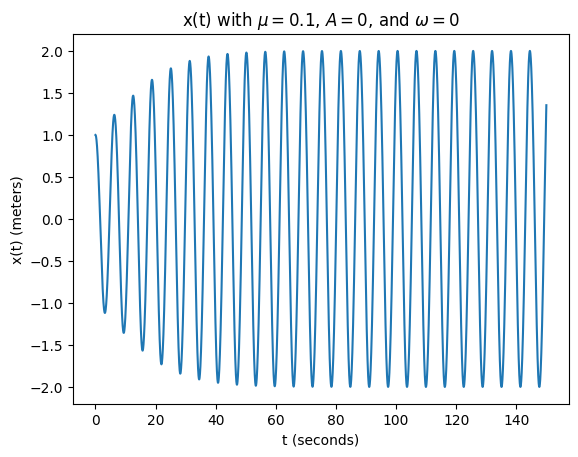

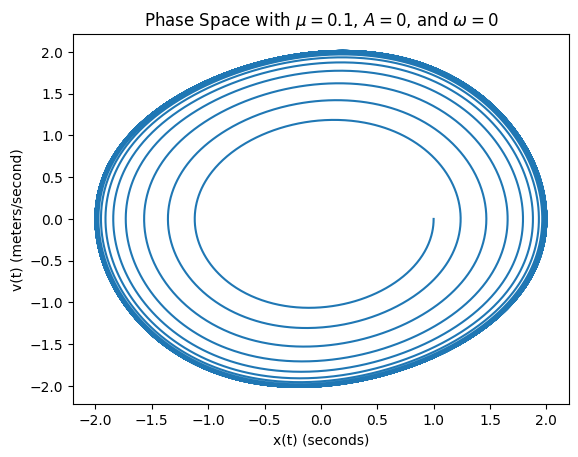

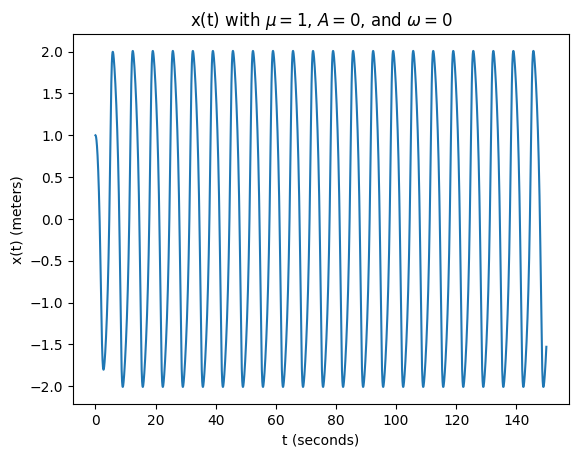

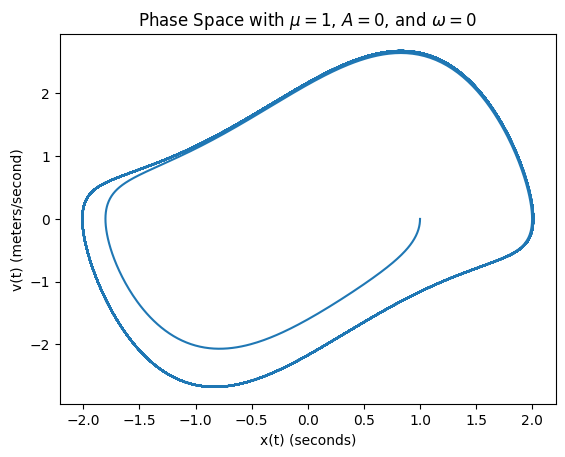

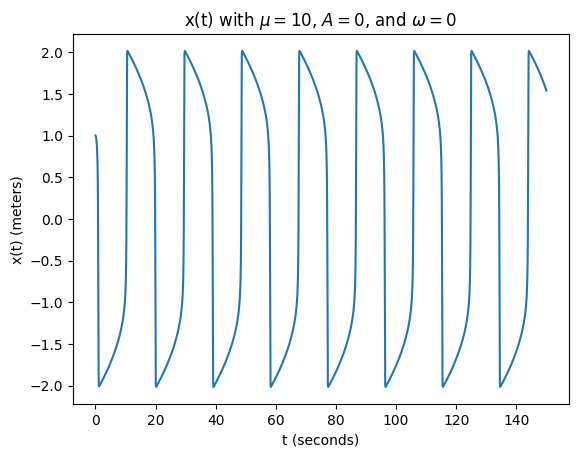

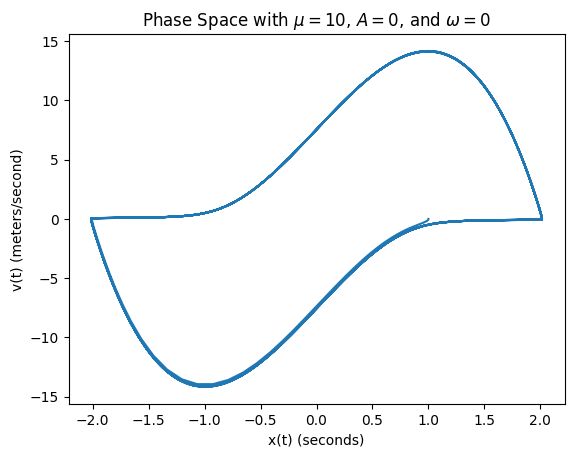

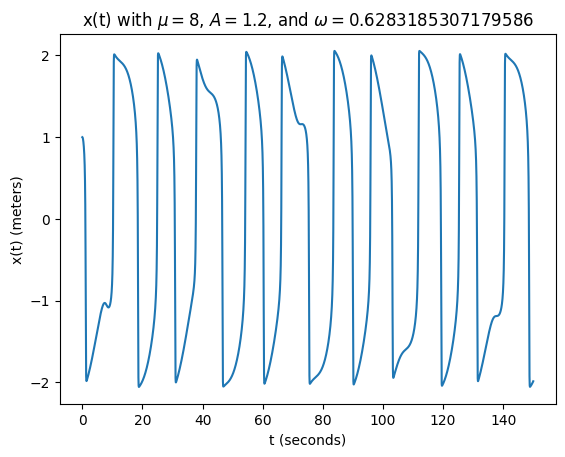

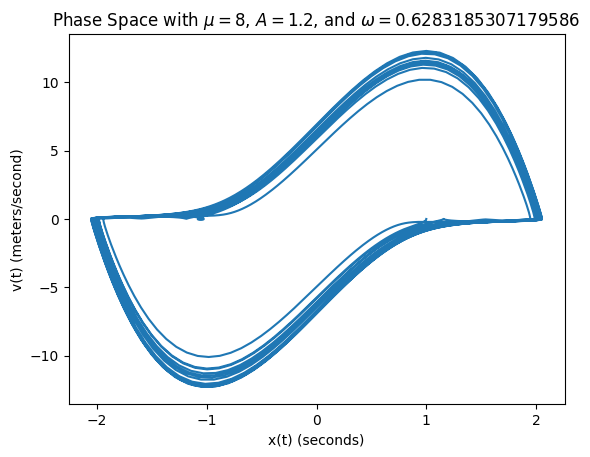


Increasing the parameter mu while holding A at 0 causes the motion of the object to stabilize into a periodic pattern more quickly.
The parameter set given by (d) results in chaotic behavior.


In [21]:
mu    = [0.1, 1, 10, 8]
A     = [0, 0, 0, 1.2]
omega = [0, 0, 0, 2*np.pi/10]

for i in range(len(mu)):
    mu_i    = mu[i]
    A_i     = A[i]
    omega_i = omega[i]

    def f(r,t):
        x_pos = r[0]
        x_vel = r[1]

        fx = x_vel
        fv = A_i*math.sin(omega_i*t) + mu_i*(1-x_pos**2)*x_vel - x_pos
        return np.array([fx,fv],float)
    
    x0 = 1
    v0 = 0

    t0 = 0
    tf = 150

    h = 0.01
    n = int((tf - t0)/h)

    tpoints = np.linspace(t0,tf,n+1)
    xpoints = []
    vpoints = []
    r=np.array([x0,v0],float)
    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1=h*f(r,t)
        k2=h*f(r+k1/2,t+h/2)
        k3=h*f(r+k2/2,t+h/2)
        k4=h*f(r+k3,t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)

    plt.plot(tpoints, xpoints)
    plt.title(f'x(t) with $\mu={{{mu_i}}}$, $A={{{A_i}}}$, and $\omega = {{{omega_i}}}$')
    plt.xlabel('t (seconds)')
    plt.ylabel('x(t) (meters)')
    plt.savefig(f'x(t)_mu={mu_i}_A={A_i}_omega={omega_i}.png', dpi=300)

    plt.show()


    plt.plot(xpoints, vpoints)
    plt.title(f'Phase Space with $\mu={{{mu_i}}}$, $A={{{A_i}}}$, and $\omega = {{{omega_i}}}$')
    plt.xlabel('x(t) (seconds)')
    plt.ylabel('v(t) (meters/second)')
    plt.savefig(f'PS_mu={mu_i}_A={A_i}_omega={omega_i}.png', dpi=300)

    plt.show()


print("""
Increasing the parameter mu while holding A at 0 causes the motion of the object to stabilize into a periodic pattern more quickly.
The parameter set given by (d) results in chaotic behavior.""")